# Imports

In [1]:
#workhorses
import numpy as np
import pandas as pd

import itertools

#for custom colormaps
from matplotlib.colors import LinearSegmentedColormap

#for proxy artists for legends
import matplotlib.lines as mlines

import seaborn as sns

# Plotting modules
import bokeh.io
import bokeh.plotting

bokeh.io.output_notebook()

Loading BokehJS ...

In [2]:
#plotting things

#%matplotlib qt5 -- I don't know what this is
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from cycler import cycler


#All of Anandh's customized seaborn/matplotlib settings

sns.set_context("poster", font_scale=1.5, rc={"lines.linewidth": 1.5})
sns.set_style("ticks")
sns.set_style({"xtick.direction": "in","ytick.direction": "in"})

#%config InlineBackend.figure_f.ormats=['svg']

mpl.rc('axes', prop_cycle=(cycler('color', ['k', 'y', 'b','g','y','m','c']) ))

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

#mpl.rc('text', usetex=False)
#mpl.rc('text.latex', preamble=r'\usepackage{helvet}
#\renewcommand\familydefault{\sfdefault}\usepackage{sansmath}\sansmath')

    #If you want to use a different font
# mpl.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica'], 
#                  'serif': ['Helvetica']})

tw = 1.5
sns.set_style({"xtick.major.size": 3, "ytick.major.size": 3,
               "xtick.minor.size": 2, "ytick.minor.size": 2,
               'axes.labelsize': 16, 'axes.titlesize': 16,
               'xtick.major.width': tw, 'xtick.minor.width': tw,
               'ytick.major.width': tw, 'ytick.minor.width': tw})

mpl.rc('xtick', labelsize=25) 
mpl.rc('ytick', labelsize=25)
mpl.rc('axes', linewidth=1.5)
mpl.rc('legend', fontsize=14)
mpl.rc('figure', figsize=(9,8))

## get data

In [3]:
directory = 'Z:/Reed/Projects/micro_consortia/DARPA_biocon/Task 1.1/A=B/20190913 a=b ham dil 5/'

filename = '20190913 a=b ham dil 5.xlsx'

In [4]:
dd = pd.read_excel(directory + filename, sheet_name=None)

In [5]:
dd.keys()

odict_keys(['all_raw', 'OD700', 'CFP60', 'CFP100', 'YFP60', 'YFP100', 'OD700_tidy', 'CFP60_tidy', 'CFP100_tidy', 'YFP60_tidy', 'YFP100_tidy', 'all_tidy', 'dil_trace_tidy', 'IDs', 'Exp'])

In [6]:
sheets_to_plot = [x for x in dd.keys() if 'tidy' in x]

In [7]:
sheets_to_plot

['OD700_tidy',
 'CFP60_tidy',
 'CFP100_tidy',
 'YFP60_tidy',
 'YFP100_tidy',
 'all_tidy',
 'dil_trace_tidy']

## make relevant indices

In [8]:
df = dd[sheets_to_plot[-1]]

# *Time course data plots*

In [10]:
#enumerate subconditions
inducers = ['iptg', 'sal', 'dhba']
g = [np.unique(df[ind]) for ind in inducers]


conds = list(itertools.product(g[0], g[1], g[2]))

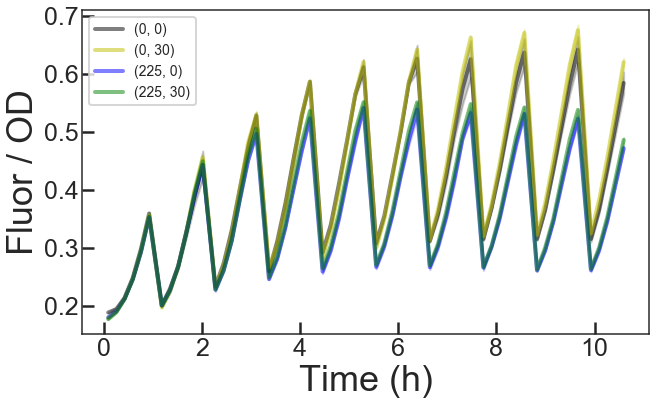

In [25]:
#create plot(s)
fig, ax = plt.subplots(figsize=(10,6.5))

colors = ['k', 'y', 'b','g']


for cond,c in zip(conds, colors):

    ii = (df['iptg'] == cond[0]) & (df['sal'] == cond[1])# & (df['Time'] == max(df['Time']))
    
    d = df.loc[ii]
    
    sns.lineplot(x="Time", y="od700", data=d, ci='sd',
                 lw=4, alpha=0.5, color=c,
                 label=cond, ax=ax)
    
#     sns.lineplot(x="Time", y="yfp100_norm", data=d, ci='sd',
#                  lw=4, alpha=0.5, color=c,
#                  label=cond, ax=ax)
    
plt.tight_layout()
    
plt.xlabel('Time (h)')
plt.ylabel('Fluor / OD')
    
    
lines = fig.axes[0].lines
l = lines[1::2]
l0 =lines[::2]


# for line in l:
#     line.set_linestyle('--')
    
plt.legend(handles = lines, loc='upper left')

In [22]:
fig.savefig(directory + 'od_diltrace.pdf')

## Endpoint data plots

In [84]:
df = dd[sheets_to_plot[-2]]

In [ ]:
#enumerate subconditions
inducers = ['iptg', 'sal']
g = [np.unique(df[ind]) for ind in inducers]


conds = list(itertools.product(g[0], g[1]))

In [86]:
df['ind'] = df['iptg'] + df['sal']

### want to generate the same kind of plot but with all the inducer conds and CFP vs YFP in each column, x axis is endpoint of each dil. Use the dodge part of swarm?

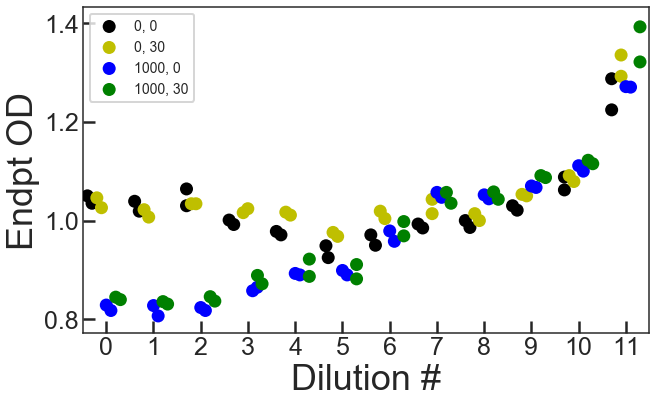

In [101]:
#create plot(s)
fig, ax = plt.subplots(figsize=(10,6.5))

colors = ['k', 'y', 'b','g']


# for cond,c in zip(conds, colors):

ii = (df['Time'] == max(df['Time'])) #(df['iptg'] == cond[0]) & (df['sal'] == cond[1]) & 

d = df.loc[ii]

sns.swarmplot(x="dil", y="od700", data=d, hue='ind', size=13, dodge=True,
              ax=ax)

# sns.swarmplot(x="dil", y="yfp60_norm", data=d, hue='ind', marker='>', size=13, dodge=True,
#               ax=ax)
    
plt.tight_layout()
    
plt.xlabel('Dilution #')
plt.ylabel('Endpt OD')
    
    
lines = fig.axes[0].lines
l = lines[1::2]
l0 =lines[::2]


# for line in l:
#     line.set_linestyle('--')
    
plt.legend(labels=['0, 0', '0, 30', '1000, 0', '1000, 30'],  loc='upper left')

In [102]:
fig.savefig('endpt_od.pdf')

# Generate a facetgrid for all the wells showing just one measurement over time

## access and format the data

In [71]:
df = dd[data].loc[inds]

#having an issue where fluor values are being read as "object" rather than numbers
# df.loc[:,'value'] = df.loc[:, 'value'].astype(float)

In [72]:
df.columns

Index(['Time', 'Temp C', 'well', 'od700', 'a', 'b', 'iptg', 'sal', 'ara',
       'cfp', 'yfp', 'cfp_norm', 'yfp_norm', 'dil'],
      dtype='object')

In [73]:
all_sal = np.unique(df['sal'])
all_iptg = np.unique(df['iptg'])
all_ara = np.unique(df['ara'])

In [74]:
###get relevant info for color mapping

#what are the unique inducer conditions you want to make diff colors
ind_concs = np.unique(df['ara'])
ind_labels = ['OFF', 'ON']

#create a list of values from x-1 of same length as unique inducer concs
#this gets fed to the cmap to get rgb colors
mapping_list = np.linspace(0.37,1,len(ind_concs))

###get some colors that cover all the inducer conditions

#select your color map
names = {'b' : 'Blues', 'y' : 'YlOrBr', 'black' : 'binary'}

cmaps = {k:mpl.cm.get_cmap(v) for (k,v) in names.items()}


#create a list of rgb tuples
clist = {k : [cmap(x) for x in mapping_list] for (k,cmap) in cmaps.items()}


#create the palette dictionary for the facegrid function
pal = {k : {conc:color for conc,color in zip(ind_concs, rgb_tuples)} for (k, rgb_tuples) in clist.items()}

In [75]:
def custom_pal_lineplot (x, y, **kwargs):
    
    #set the plotting to go to the current axis
    #this is a requirement for using function in mapping to facetgrid
    ax = plt.gca()
    
    #remove the data from the kwargs (where facetgrid puts the data)
    #and store it in this variable
    data = kwargs.pop("data")
    
    #get the passed palette out to get colors for color.
    #facetgrid passes a label in the kwargs too which is whatever value of the "hue"
    #param it is plotting at the moment
    pal = kwargs.pop('palette')

    #get the label out
    label = kwargs.pop('label')
    
    
    sns.lineplot(x=x, y=y, data=data, ci=kwargs['ci'], color=pal[label], dashes=True, linewidth=kwargs['linewidth'], ax=ax)

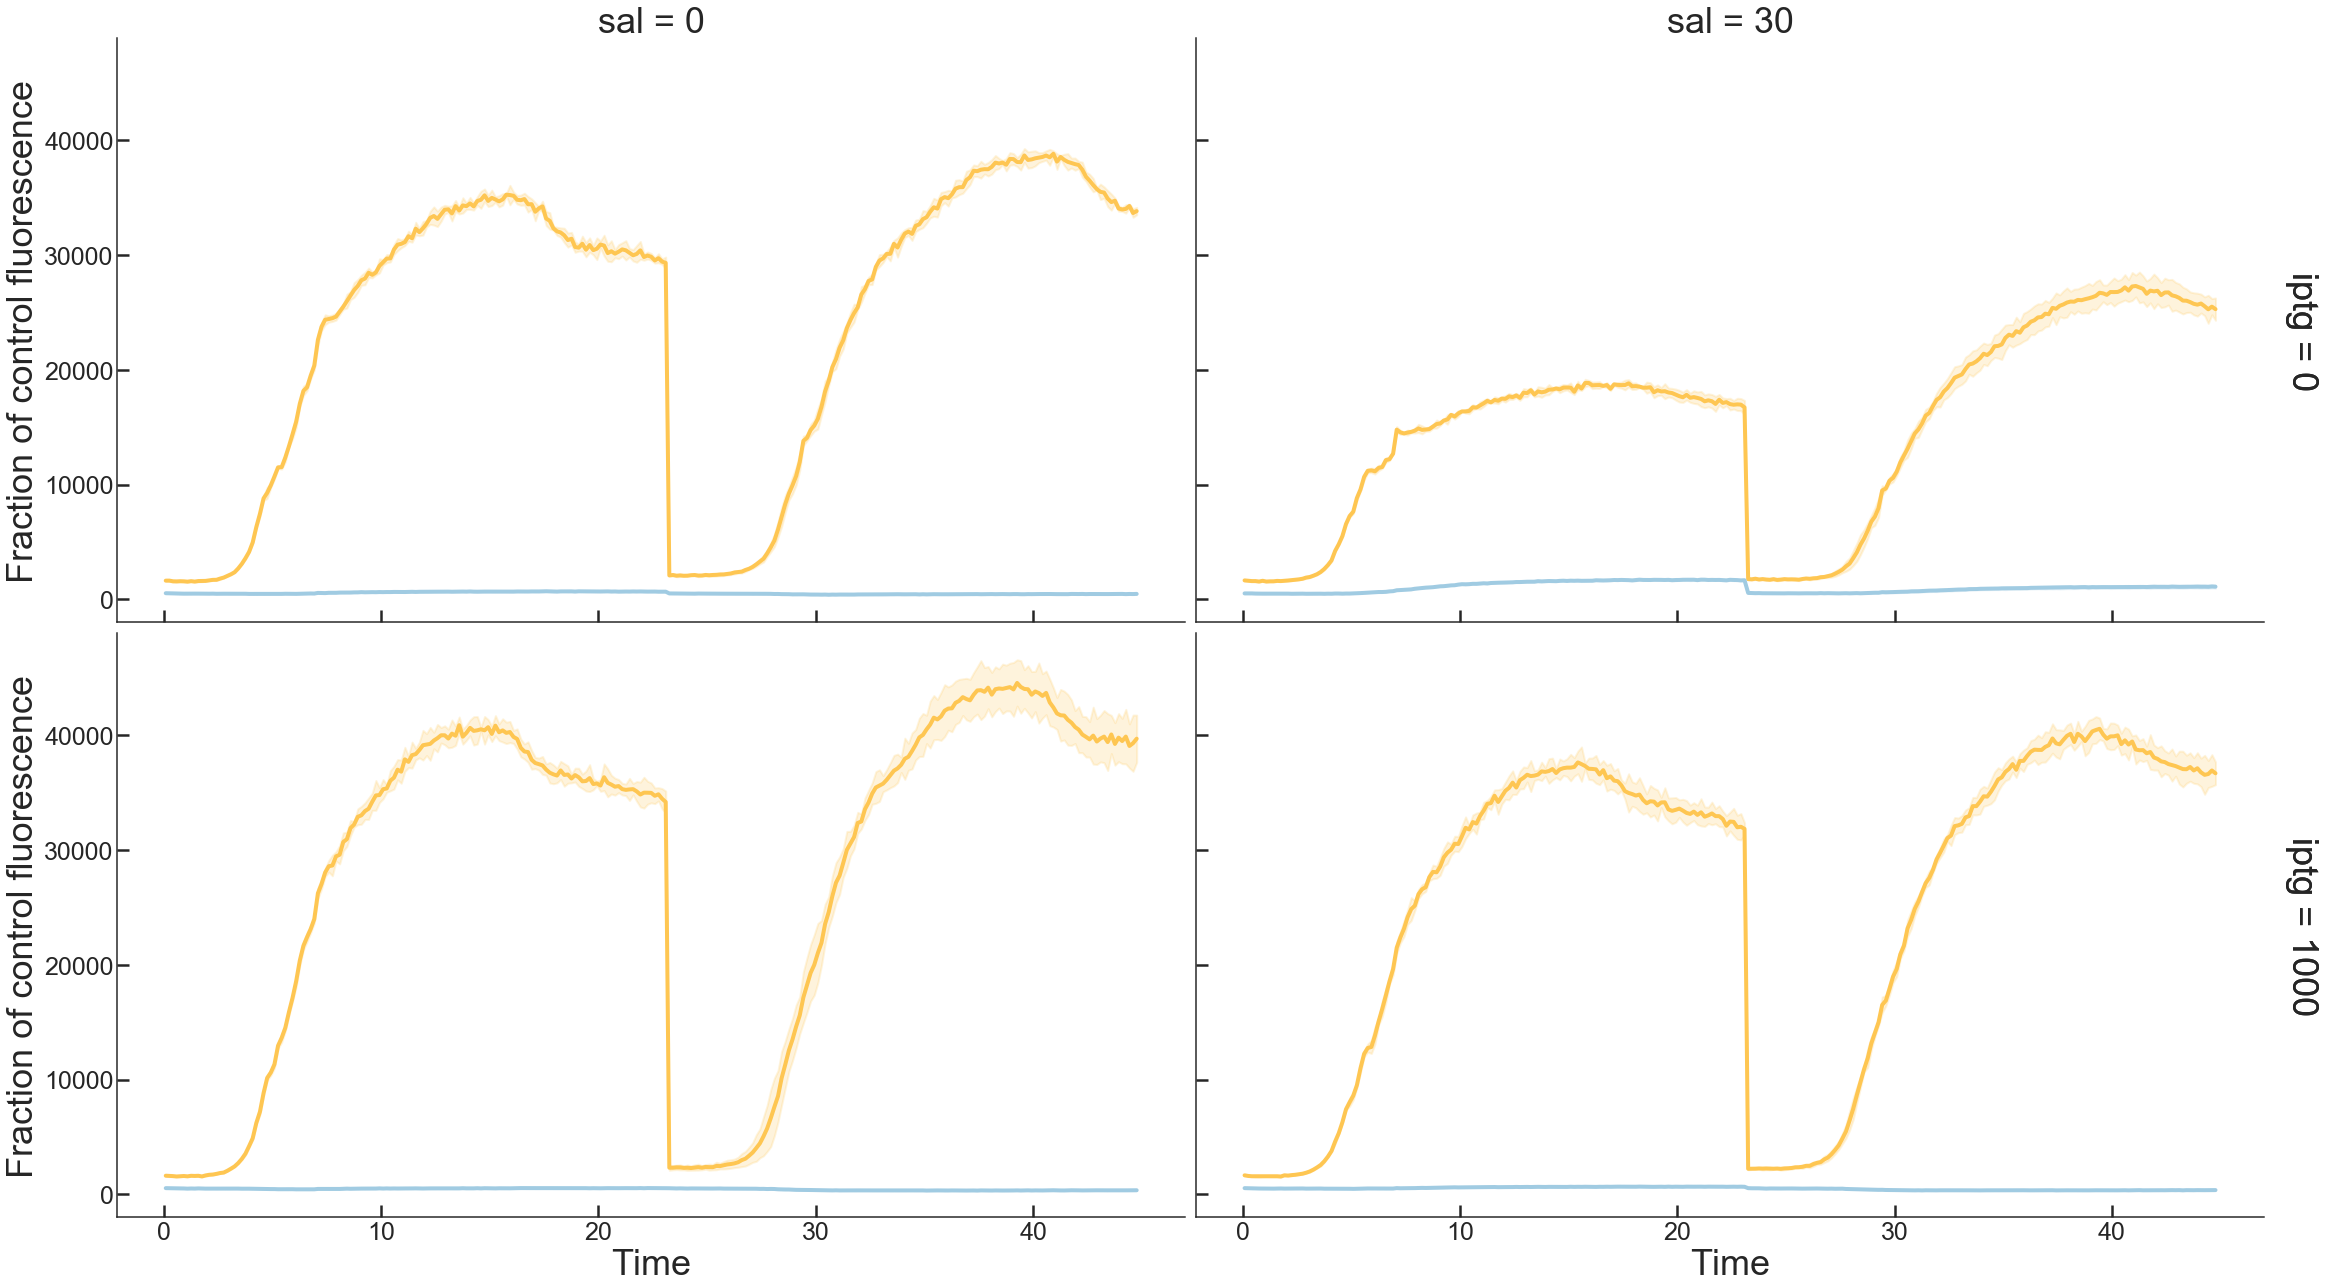

In [76]:
g = sns.FacetGrid(df, col='sal', row='iptg', hue='ara',
                  height=9, aspect=1.8, margin_titles=True, legend_out=False)

#set kws for the first set of lines
kws = {'ci': 'sd', 'linewidth' : 4, 'palette' : pal['y']}
g.map_dataframe(custom_pal_lineplot, "Time", "yfp", **kws)

# set new kws for the second set of lines
kws = {'ci': 'sd', 'linewidth' : 4, 'palette' : pal['b']}
g.map_dataframe(custom_pal_lineplot, "Time", "cfp", **kws)


#create a custom legend
# proxy_lines = [mlines.Line2D([], [], color=pal['black'][i], linewidth=4) for i in ind_concs]

# g.fig.legend(handles=proxy_lines, labels=ind_labels + ind_labels, title='IPTG uM, Sal uM',
#              fontsize='small', bbox_to_anchor=(0.42, 0.95))


g.set_axis_labels('Time', "Fraction of control fluorescence")

In [249]:
# g.savefig(directory + 'all_ab_combos_onoff_od.pdf')

# *CFP/YFP space*

### access just the data you'll use here

In [120]:
##get the data
d=dd[data]

##get the indices

#get the control ones
ctrl = dd[data]['a'] == 'ctrl'

#get the media blank ones
med = dd[data]['a'] == 'lb'

#get the ones without a and b cells
no_a = dd[data]['a'] == 'x'
no_b = dd[data]['b'] == 'x'

#get the ones in the first growth cycle
first = dd[data]['dil'] == 0

#now all the mixes should be accessible by asking for 
#NOT the no a and b indices and NOT the ctrl and med indices

mix = ~no_a & ~no_b & ~ctrl & ~med

In [168]:
###get relevant info for color mapping

#what are the unique inducer conditions you want to make diff colors
ind_concs = np.unique(d['iptg'])
ind_labels = all_ind_pairs

#create a list of values from x-1 of same length as unique inducer concs
#this gets fed to the cmap to get rgb colors
mapping_list = np.linspace(0.4,1,len(ind_concs))

###get some colors that cover all the inducer conditions

#select your color map
cmap = mpl.cm.get_cmap('BuGn')

#create a list of rgb tuples
clist = [cmap(x) for x in mapping_list]

#create the palette dictionary for the facegrit function
pal = {conc : color for conc,color in zip(ind_concs, clist)}

## make the plot

In [169]:
def bin_scatter_sd (x, y, **kwargs):
    """
    from more or less continuous data in 2d fluorescence space, plot a binned scatterplot with sd confidence intervals
    """
    #set the plotting to go to the current axis
    #this is a requirement for using function in mapping to facetgrid
    ax = plt.gca()
    
    #remove the data from the kwargs (where facetgrid puts the data)
    #and store it in this variable
    data = kwargs.pop("data")
    
    #also pop out the color entry from kwargs (it gets this from palette you set in facetgrid)
    color = kwargs.pop("color")
    
    #also get the legend labels
    label = kwargs.pop("label")
    
    #do a regplot without the fit (so a scatter)
    sns.regplot(x=x, y=y, data=data, fit_reg=False,
                #bin the data on the x axis to allow computation of confidence intervals on the 4 replicate traces
                x_bins=125, x_ci='sd',
                #adjust colors, size and alpha of scatter points, other aesthetics
                color=color, scatter_kws={"s": 35, 'alpha' : kwargs['alpha']},
                #matplotlib object stuff
                ax=ax, label=label)
    
    #adjust the alpha of the confidence interval lines, since those are the only line objects on the plot
    plt.setp(ax.get_lines(), alpha=kwargs['alpha']);

In [170]:
df = d.loc[mix]

In [171]:
g = sns.FacetGrid(df, col="a", row ="b", hue='iptg', palette=pal,
                  height=8, aspect=1.3, margin_titles=True, legend_out=True)


g.map_dataframe(bin_scatter_sd, "cfp_recntr", "yfp_recntr", **{'alpha' : 0.6})


######################### adding reference curves

#plot the a only data on the axes
for axis in g.fig.get_axes():
    #set the current axis to one of the figure axes
    plt.sca(axis)
    
    #create kwargs to match bin_scatter_sd syntax
    ref_data_a = d.loc[no_b]
    color = mpl.colors.to_rgba('blue')
    kwargs = {'color' : color, 'data' : ref_data_a, 'label' : 'A only', 'alpha' : 0.15}
    
    #plot
    bin_scatter_sd("cfp_recntr", "yfp_recntr", **kwargs)
    
    
for axis, b_type in zip(g.fig.get_axes(), np.unique(d.loc[no_a, 'b'])):
    #set the current axis to one of the figure axes
    plt.sca(axis)
    
    #create kwargs to match bin_scatter_sd syntax
    i = no_a & (d['b'] == b_type)
    ref_data_a = d.loc[i]
    color = mpl.colors.to_rgba('goldenrod')
    kwargs = {'color' : color, 'data' : ref_data_a, 'label' : 'B only', 'alpha' : 0.15}
    
    #plot
    bin_scatter_sd("cfp_recntr", "yfp_recntr", **kwargs)
    

########## aesthetics
g.set_axis_labels("CFP", "YFP")
    
plt.close()




C:\Users\geeze\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [27]:
#get one of the axes on which the data is drawn
ax = g.fig.get_axes()[0]

#get the handles (objects assigned labels) and the labels of those handles
handles, labels = ax.get_legend_handles_labels()

#replace the labels with the ones you made earlier
(g.fig.legend(handles, all_ind_pairs + labels[-2:], fontsize='xx-small', bbox_to_anchor=(0.92, 0.92))
 .set_title("IPTG uM, Sal uM", prop = {'size':'x-small'}))

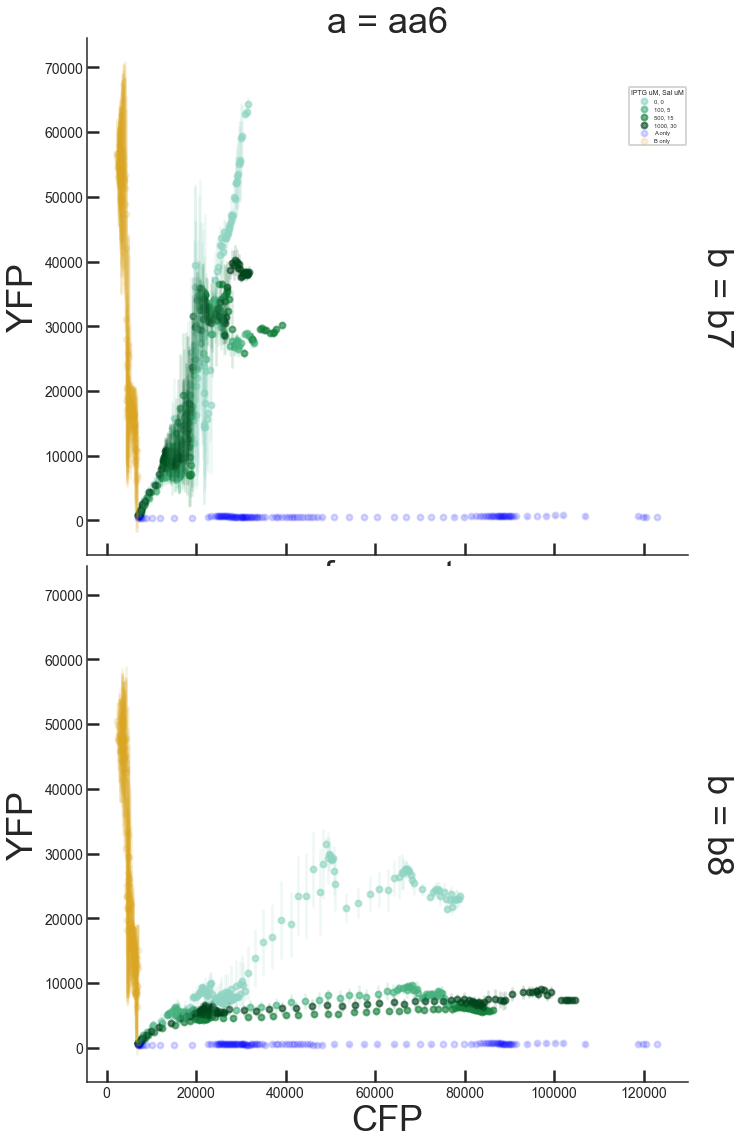

In [28]:
g.fig

In [29]:
g.savefig(directory + 'both_fluor_scatter_full_recntr_refs.pdf')

## Endpoints for diff seed ratios

In [13]:
last_time = max(data['Time'])
i = data['Time'] == last_time

df = data.loc[i]

In [20]:
df.head()

,Time,Temp C,well,od700,afrac_s,bfrac_s,iptg,sal,ara,cfp61,cfp100,yfp61,yfp100,cfp61_norm,cfp100_norm,yfp61_norm,yfp100_norm
143,23.928056,37.0,A1,1.447,0.833333,0.166667,0,0,0,8907,99999,1788,63037,6155.494126,69107.80926,1235.659986,43563.92536
287,23.928056,37.0,A2,1.156,0.750000,0.250000,0,0,0,5813,99999,2165,75164,5028.546713,86504.32526,1872.837370,65020.76125
431,23.928056,37.0,A3,1.117,0.666667,0.333333,0,0,0,4717,99999,2607,91510,4222.918532,89524.61952,2333.930170,81924.79857
575,23.928056,37.0,A4,1.184,0.500000,0.500000,0,0,0,3115,99999,3361,99999,2630.912162,84458.61486,2838.682432,84458.61486
719,23.928056,37.0,A5,1.208,0.333333,0.666667,0,0,0,2233,78336,3882,99999,1848.509934,64847.68212,3213.576159,82780.62914


In [96]:
i = ara_hi


#enumerate subconditions
inducers = ['iptg', 'sal', 'ara']
g = [np.unique(df.loc[i, ind]) for ind in inducers]


conds = list(itertools.product(g[0], g[1], g[2]))

colors = ['r', 'k', 'b','g','y','m','c']

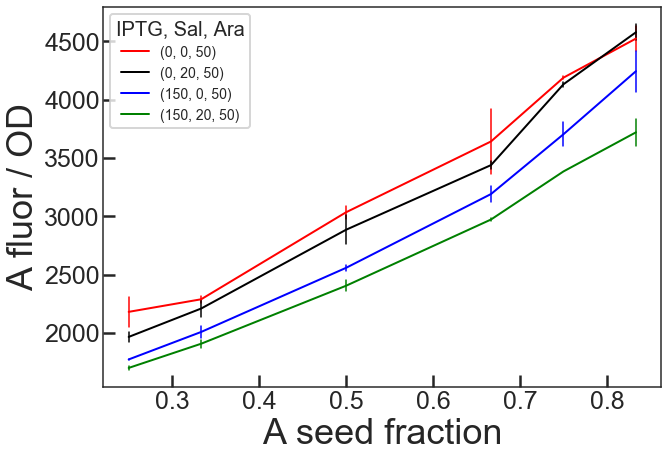

In [99]:
fig, ax = plt.subplots(figsize=(10,7))


for cond,c in zip(conds, colors):

    ii = (df['iptg'] == cond[0]) & (df['sal'] == cond[1]) & (df['ara'] == cond[2])
#     ii = df['afrac_s'] == cond
    
    d = df.loc[ii]

    sns.lineplot(x="afrac_s", y="cfp61_norm", data=d, color=c, err_style="bars",
                 ax=ax, label=cond, lw=2)

lines = fig.axes[0].lines
l = lines[::2]
plt.legend(handles=l, labels=conds, title='IPTG, Sal, Ara', title_fontsize=20)

plt.xlabel('A seed fraction')
plt.ylabel('A fluor / OD')


# plt.savefig(directory + 'Aendfluor_deg.pdf')